<a href="https://colab.research.google.com/github/SafaruzzamanShovo/Python-BootCamp/blob/main/Graduate_Admission_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graduate Admission Prediction using ANN**

The main aim of this project is to predict the house price based on various features

#### Dataset to downloaded from the below link
https://www.kaggle.com/datasets/safaruzzamanshovo/graduate-admission-dataset

Google Drive: https://drive.google.com/drive/folders/1qTynUIBSwuyg-QzIZUphCJzBbMrzL95E?usp=drive_link


Dataset Copyright : ***Safaruzzaman Shovo***

This is my own made Dataset for solving this Problem. If you want to use the dataset in you project just visit the link, download and use it. Never forget to mention me in your project.

## Mount **Google Drive** in Colab

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
train_dataset = pd.read_csv('/content/drive/MyDrive/ML Datasets/Graduate Admission Predicition Using ANN/graduate_admission_predictions.csv')


In [20]:
# Top 5 records from dataset
train_dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Chance of Admit
0,295,96,2,4.9,1.7,2.93,0,0.612
1,340,119,3,4.1,1.7,3.76,0,0.708
2,336,96,1,3.2,1.8,3.12,1,0.728
3,337,108,4,3.4,1.3,2.11,0,0.643
4,323,98,1,1.1,1.3,3.40,0,0.524


In [21]:
# Shape of Data
train_dataset.shape

(1000, 8)

In [25]:
# Check we have missing value or not
print(train_dataset.info)

<bound method DataFrame.info of      GRE Score  TOEFL Score  University Rating  SOP  LOR    GPA  Research  \
0          295           96                  2  4.9   1.7  2.93         0   
1          340          119                  3  4.1   1.7  3.76         0   
2          336           96                  1  3.2   1.8  3.12         1   
3          337          108                  4  3.4   1.3  2.11         0   
4          323           98                  1  1.1   1.3  3.40         0   
..         ...          ...                ...  ...   ...   ...       ...   
995        305          120                  5  4.4   2.0  3.00         1   
996        293          111                  2  2.7   1.7  2.56         1   
997        337          106                  1  4.3   2.5  2.79         0   
998        306          105                  2  2.0   4.1  3.00         0   
999        306           94                  2  1.6   1.5  3.72         1   

     Chance of Admit  
0              0.612

In [26]:
train_dataset.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
GPA,0
Research,0
Chance of Admit,0


Check If there any Duplicate Row in dataset

In [28]:
train_dataset.duplicated().sum()

np.int64(0)

# Split the Dataset: **Train Dataset and Test Dataset**

In [31]:
X = train_dataset.iloc[:,:-1]
y = train_dataset.iloc[:,-1]


In [32]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research
0,295,96,2,4.9,1.7,2.93,0
1,340,119,3,4.1,1.7,3.76,0
2,336,96,1,3.2,1.8,3.12,1
3,337,108,4,3.4,1.3,2.11,0
4,323,98,1,1.1,1.3,3.40,0
...,...,...,...,...,...,...,...
995,305,120,5,4.4,2.0,3.00,1
996,293,111,2,2.7,1.7,2.56,1
997,337,106,1,4.3,2.5,2.79,0
998,306,105,2,2.0,4.1,3.00,0


In [33]:
y

,Chance of Admit
0,0.612
1,0.708
2,0.728
3,0.643
4,0.524
...,...
995,0.915
996,0.760
997,0.583
998,0.586


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research
382,303,114,1,4.2,1.2,2.54,0
994,335,99,1,3.5,1.9,2.66,1
982,337,107,4,1.7,1.2,3.70,0
47,324,96,5,4.8,1.9,3.30,0
521,298,111,3,2.2,1.7,3.49,1
...,...,...,...,...,...,...,...
767,314,116,5,4.0,4.7,2.99,0
72,294,113,3,2.1,3.1,2.96,1
908,332,115,1,1.1,2.2,2.43,1
235,306,107,3,3.8,1.6,3.17,1


# **Feature Engineering**

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train_scaled

array([[0.26      , 0.78571429, 0.        , ..., 0.05      , 0.26633166,
        0.        ],
       [0.9       , 0.25      , 0.        , ..., 0.225     , 0.32663317,
        1.        ],
       [0.94      , 0.53571429, 0.75      , ..., 0.05      , 0.84924623,
        0.        ],
       ...,
       [0.84      , 0.82142857, 0.        , ..., 0.3       , 0.21105528,
        1.        ],
       [0.32      , 0.53571429, 0.5       , ..., 0.15      , 0.58291457,
        1.        ],
       [1.        , 0.35714286, 0.        , ..., 0.4       , 0.41708543,
        1.        ]])

# **Building Neural Network Architecture**

In [41]:
# Import Essential Library

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [80]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [82]:
# Compile the model

model.compile(loss="mean_squared_error", optimizer="Adam")

# **Model Training**

In [83]:
history = model.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2)


Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3448 - val_loss: 0.2264
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2083 - val_loss: 0.1110
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0947 - val_loss: 0.0514
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0486 - val_loss: 0.0320
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0364 - val_loss: 0.0251
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0264 - val_loss: 0.0189
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - val_loss: 0.0138
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - val_loss: 0.0103
Epoch 9/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - val_loss: 0.0080
Epoch 10/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - val_loss: 0.0068
Epoch 11/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - val_loss: 0.0061
Epoch 12/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 

# **Model Prediction**

In [84]:
y_pred = model.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


# **Model Performance / Accuracy**



In [85]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8814605703312737

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Chance of Admit for the selected row: 0.704


# **Prediction on New Data**

In [94]:

new_data = pd.DataFrame({
    'GRE Score': [325],
    'TOEFL Score': [110],
    'University Rating': [4],
    'SOP': [4.5],
    'LOR ': [4.0],
    'GPA': [3.8],
    'Research': [1]
})

print("New data for prediction:")
display(new_data)

New data for prediction:


,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research
0,325,110,4,4.5,4.0,3.8,1


Now, let's preprocess the new data using the same scaler fitted on the training data.

In [95]:
# Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)

print("\nScaled new data:")
print(new_data_scaled)


Scaled new data:
[[0.7        0.64285714 0.75       0.875      0.75       0.89949749
  1.        ]]


Finally, let's use the trained model to predict the chance of admit for the new data.

In [97]:
# Make a prediction using the trained model
predicted_chance_new_data = model.predict(new_data_scaled)

# Display the predicted chance of admit for the new data
print(f"\nPredicted Chance of Admit for the new data: {predicted_chance_new_data[0][0]:.3f}")

# Add conditional statement based on the predicted chance
if predicted_chance_new_data[0][0] > 0.5:
    print("Congrats! You get admission into MIT")
else:
    print("Sorry, Better Luck next time")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

Predicted Chance of Admit for the new data: 0.912
Congrats! You get Admission in MIT


# **Validation Loss Graph**

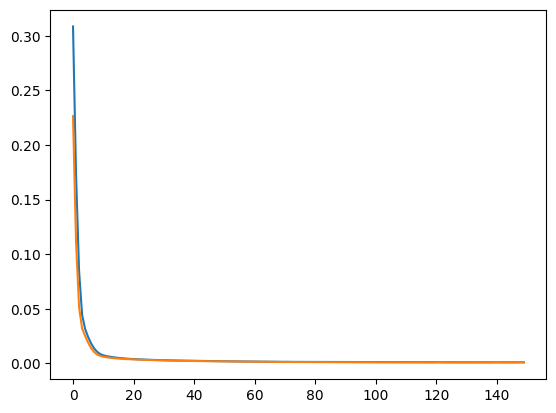

In [86]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])